In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import similaritymeasures



In [4]:
filepath = "RELIANCE_2010-01-012021-08-30.csv"
data = pd.read_csv(filepath)
data = data.sort_values('Date')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2010-01-04,1091.1,1091.1,1021.85,1075.50,17520006,RELIANCE
1,2010-01-05,1149.9,1149.9,1065.40,1070.70,4890040,RELIANCE
2,2010-01-06,1079.9,1094.5,1070.65,1088.00,5415538,RELIANCE
3,2010-01-07,1088.0,1115.0,1078.00,1106.05,5988404,RELIANCE
4,2010-01-08,1108.0,1113.8,1096.00,1103.15,3453926,RELIANCE


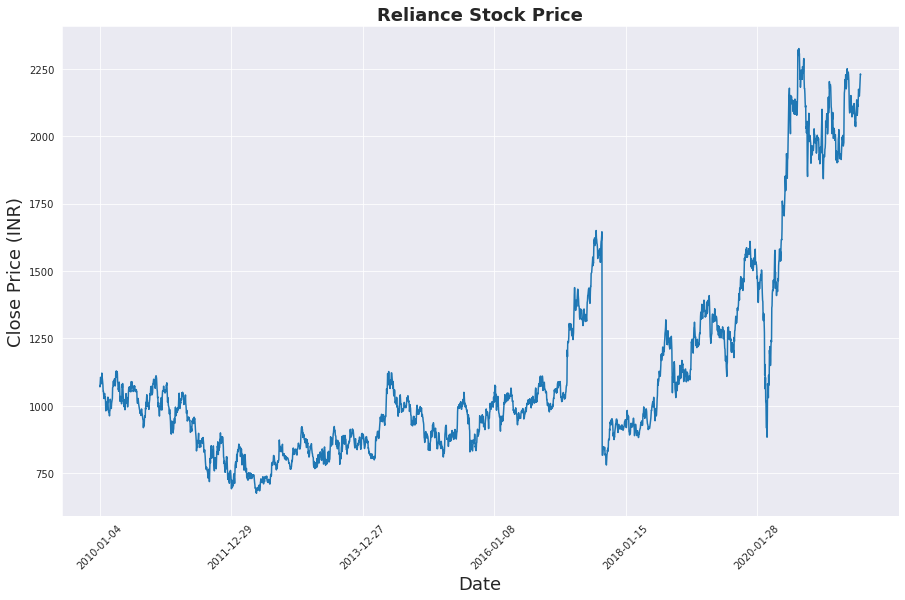

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data[['Close']])
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.title("Reliance Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (INR)',fontsize=18)
plt.show()

In [6]:
price = data[['Close']]

In [7]:
def splitData(ts):

    test_set_size = int(np.round(0.2*len(ts)));
    train_set = ts[:-test_set_size]    
    test_set = ts[-test_set_size:]

    return train_set, test_set


In [8]:
train_set, test_set = splitData(price['Close'].values)

In [29]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

In [30]:
# Normalize the training, validation and test set

def normalize_data(train_set, test_set):
    train_norm = scaler.fit_transform(train_set.reshape(-1, 1))
    test_norm = scaler.transform(test_set.reshape(-1, 1))
    
    return train_norm, test_norm

In [31]:
train_norm, test_norm = normalize_data(train_set, test_set)

In [35]:
a = train_norm.flatten()

In [36]:
a.shape

(2316,)

In [41]:
len(train_set)

2316

In [44]:
len(data)

2895

In [43]:
train_set[-5:]

array([1345.35, 1363.85, 1389.5 , 1372.4 , 1392.8 ])

In [45]:
test_set[-5:]

array([2162.35, 2183.7 , 2202.6 , 2230.45, 2227.4 ])

In [49]:
# Generate random experimental data
x = np.arange(0,len(train_norm),1)
y = train_set
exp_data = np.zeros((len(train_norm), 2))
exp_data[:, 0] = x
exp_data[:, 1] = y

# Generate random numerical data
x = np.arange(0,len(test_norm),1)
y = test_set
num_data = np.zeros((len(test_norm), 2))
num_data[:, 0] = x
num_data[:, 1] = y

In [57]:
# quantify the difference between the two curves using PCM
pcm = similaritymeasures.pcm(exp_data, num_data)

# quantify the difference between the two curves using
# Discrete Frechet distance
df = similaritymeasures.frechet_dist(exp_data, num_data)

# quantify the difference between the two curves using
# area between two curves
area = similaritymeasures.area_between_two_curves(exp_data, num_data)

# quantify the difference between the two curves using
# Curve Length based similarity measure
cl = similaritymeasures.curve_length_measure(exp_data, num_data)

# quantify the difference between the two curves using
# Dynamic Time Warping distance
dtw, d = similaritymeasures.dtw(exp_data, num_data)

# # print the results
print(pcm, df, area, cl, dtw)

1137.2998872384446 1929.6057239757556 18913056.297656246 39.448808957626305 2258453.3405788783


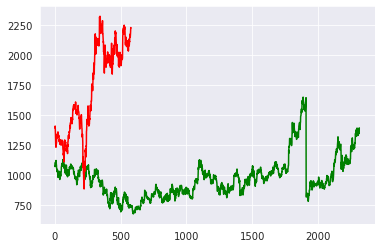

In [51]:
# plot the data
plt.figure()
plt.plot(exp_data[:, 0], exp_data[:, 1], 'g')
plt.plot(num_data[:, 0], num_data[:, 1], 'r')
plt.show()

In [11]:
import dtw

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [53]:
dtw_res = dtw.dtw(train_set, test_set)

In [55]:
dtw_res.distance

429495.25000000035

In [17]:
def modify_test_data(test_set, variance):
    
    noise = np.random.normal(0,variance,len(test_set))
    modified_test_Set = test_set + noise

    return modified_test_Set

In [18]:
variance = np.arange(0, 4.0, 0.5)
finalResult = []


for i in range(len(variance)):
    
    train_set, test_set = splitData(price['Close'].values)   
    modified_test_set = modify_test_data(test_set, variance[i])

    dtw_res = dtw.dtw(train_set, modified_test_set)
    dist = dtw_res.distance
    finalResult.append(dist)


 

In [19]:
result = pd.DataFrame(finalResult)
result.insert(0, 'Noise Variance', variance)

In [20]:
result

,Noise Variance,0
0,0.0,429495.250000
1,0.5,429639.302168
2,1.0,429269.262389
3,1.5,429511.282061
4,2.0,429648.553228
5,2.5,429571.726046
6,3.0,431720.046050
7,3.5,430270.524914


In [21]:
plt.plot(result['Noise Variance'], result['0'])

KeyError: '0'